In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import math as mt
import scipy as stats

In [2]:
from google.colab import files
files.upload=files.upload()

Saving 1.Temperatura_Instancia_1.xlsx to 1.Temperatura_Instancia_1.xlsx


# Patrón Utilizado

In [3]:
Datos=pd.read_excel('1.Temperatura_Instancia_1.xlsx')
Patron = pd.read_excel('1.Temperatura_Instancia_1.xlsx', sheet_name='Patrones') 
Info = Datos.copy() 
Patron_Utilizado = (Info[Info["ITEM"]=="PATRÓN UTILIZADO"])["DATO"].iloc[0]
T1 = Patron[Patron.PATRÓN.isin([Patron_Utilizado])]
T1

,PATRÓN,UNIDAD DE MEDIDA,TEMPERATURA DE REFERENCIA,CORRECCIÓN A LA INDICACIÓN,DERIVA,Uexp (),INCERTIDUMBRE TÍPICA,K,RESOLUCIÓN,COEFICIENTE DE VARIACIÓN CON LA TEMPERATURA,TEMPERATURA DE CALIBRACIÓN
0,TERMÓMETRO DIGITAL + SONDA 1 (1622591),°C,-30.003,0.002,0.025,0.0064,0.00320,2,0.001,0.003925,20.72
1,TERMÓMETRO DIGITAL + SONDA 1 (1622591),°C,-15.002,-0.001,0.025,0.0064,0.00320,2,0.001,0.003925,20.72
2,TERMÓMETRO DIGITAL + SONDA 1 (1622591),°C,-0.006,-0.001,0.015,0.0064,0.00320,2,0.001,0.003925,20.72
3,TERMÓMETRO DIGITAL + SONDA 1 (1622591),°C,24.999,-0.008,0.015,0.0069,0.00345,2,0.001,0.003925,20.72
4,TERMÓMETRO DIGITAL + SONDA 1 (1622591),°C,50.001,-0.006,0.015,0.0069,0.00345,2,0.001,0.003925,20.72
5,TERMÓMETRO DIGITAL + SONDA 1 (1622591),°C,100.006,-0.002,0.035,0.0079,0.00395,2,0.001,0.003925,20.72
6,TERMÓMETRO DIGITAL + SONDA 1 (1622591),°C,125.005,0.000,0.035,0.0079,0.00395,2,0.001,0.003925,20.72
7,TERMÓMETRO DIGITAL + SONDA 1 (1622591),°C,149.978,-0.002,0.035,0.0079,0.00395,2,0.001,0.003925,20.72


# Medio de Calibración Utilizado

In [4]:
Medio = pd.read_excel('1.Temperatura_Instancia_1.xlsx', sheet_name='Medio_Calibracion') 
Medio_Utilizado = (Info[Info["ITEM"]=="MEDIO UTILIZADO"])["DATO"].iloc[0]
M1 = Medio[Medio.MEDIO.isin([Medio_Utilizado])]
M1 

,MEDIO,UNIDAD DE MEDIDA,NOMINAL,ESTABILIDAD,UNIFORMIDAD RADIAL,UNIFORMIDAD AXIAL
0,Bloque seco Ecil BT1306/0819,°C,-25,0.070,0.041,0.085
1,Bloque seco Ecil BT1306/0819,°C,0,0.059,0.024,0.096
2,Bloque seco Ecil BT1306/0819,°C,50,0.064,0.033,0.087
3,Bloque seco Ecil BT1306/0819,°C,100,0.098,0.034,0.091
4,Bloque seco Ecil BT1306/0819,°C,140,0.190,0.050,0.099


# Interpolación Polinómica 

En esta parte establecemos el modelo de interpolación polinómica de grado 6

In [5]:
xi =T1["TEMPERATURA DE REFERENCIA"]
yi = T1["CORRECCIÓN A LA INDICACIÓN"]
xi = xi.reset_index(drop=True)
yi = yi.reset_index(drop=True)

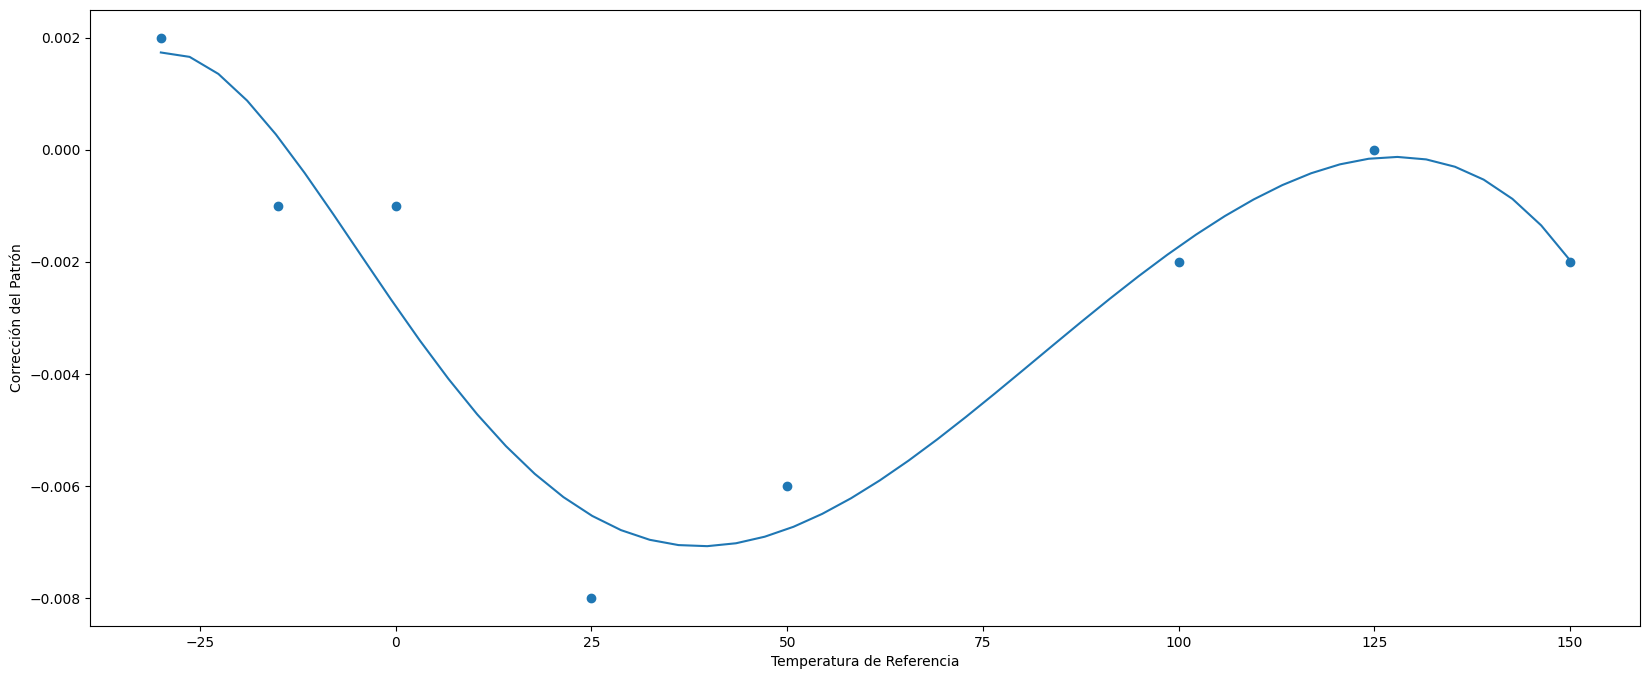

In [6]:
# Ajuste polinomial con grado = 6
Modelo = np.poly1d (np.polyfit (xi, yi, 6))  
polilínea = np.linspace (xi[0], xi[len(xi)-1])
plt.figure(figsize=(20,8))
plt.scatter(xi,yi)
plt.plot (polilínea, Modelo (polilínea))
plt.xlabel("Temperatura de Referencia")
plt.ylabel("Corrección del Patrón")
plt.show ()

In [7]:
C=Modelo
Coeficientes = pd.DataFrame(C)

# Residuos del Ajuste 

In [9]:
T2 = (T1.loc[:,['TEMPERATURA DE REFERENCIA','CORRECCIÓN A LA INDICACIÓN']])

T2["CORRECCIÓN AJUSTADA"] = Coeficientes.iloc[6,0]
T2["CORRECCIÓN AJUSTADA"] = (Coeficientes.iloc[0,0] * T2["TEMPERATURA DE REFERENCIA"].pow(6)) + (Coeficientes.iloc[1,0] * T2["TEMPERATURA DE REFERENCIA"].pow(5)) + (Coeficientes.iloc[2,0] * T2["TEMPERATURA DE REFERENCIA"].pow(4)) + (Coeficientes.iloc[3,0]*T2["TEMPERATURA DE REFERENCIA"].pow(3)) + (Coeficientes.iloc[4,0]*T2["TEMPERATURA DE REFERENCIA"].pow(2)) + (Coeficientes.iloc[5,0]*T2["TEMPERATURA DE REFERENCIA"]) + T2["CORRECCIÓN AJUSTADA"]
T2["RESIDUOS"] = T2["CORRECCIÓN A LA INDICACIÓN"] - T2["CORRECCIÓN AJUSTADA"]

In [10]:
T2.round(6)

,TEMPERATURA DE REFERENCIA,CORRECCIÓN A LA INDICACIÓN,CORRECCIÓN AJUSTADA,RESIDUOS
0,-30.003,0.002,0.001736,0.000264
1,-15.002,-0.001,0.000219,-0.001219
2,-0.006,-0.001,-0.002795,0.001795
3,24.999,-0.008,-0.006531,-0.001469
4,50.001,-0.006,-0.006777,0.000777
5,100.006,-0.002,-0.001730,-0.000270
6,125.005,0.000,-0.000149,0.000149
7,149.978,-0.002,-0.001973,-0.000027


# Mediciones

In [11]:
Mediciones = pd.read_excel('1.Temperatura_Instancia_1.xlsx', sheet_name='Mediciones')

# Cumplimiento Condiciones de Estabilidad



In [12]:
Estabilidad = pd.read_excel('1.Temperatura_Instancia_1.xlsx', sheet_name='Cump_Estabilidad')

Estabilidad = Estabilidad.rename(columns={'Unnamed: 1':'PATRÓN'})
Estabilidad["CORRECCIÓN DEL PATRÓN"] = Coeficientes.iloc[6,0]
Estabilidad["CORRECCIÓN DEL PATRÓN"] = (Coeficientes.iloc[0,0] * Estabilidad["PATRÓN"].pow(6)) + (Coeficientes.iloc[1,0] * Estabilidad["PATRÓN"].pow(5)) + (Coeficientes.iloc[2,0] * Estabilidad["PATRÓN"].pow(4)) + (Coeficientes.iloc[3,0]*Estabilidad["PATRÓN"].pow(3)) + (Coeficientes.iloc[4,0]*Estabilidad["PATRÓN"].pow(2)) + (Coeficientes.iloc[5,0]*Estabilidad["PATRÓN"]) + Estabilidad["CORRECCIÓN DEL PATRÓN"]
Estabilidad["VALOR DE REFERENCIA"] = Estabilidad["PATRÓN"]+ Estabilidad["CORRECCIÓN DEL PATRÓN"]

#Primera parte de la estabilidad
Estabilidad["ESTABILIDAD"] = 0
for i in range(0,len(Estabilidad),2):
  Estabilidad["ESTABILIDAD"].loc[i] = np.abs(Estabilidad["VALOR DE REFERENCIA"].loc[i+1] - Estabilidad["VALOR DE REFERENCIA"].loc[i])
Estabilidad 

#Segunda parte de la estabilidad
k=0
for j in range(1,len(Estabilidad),2):
    Estabilidad["ESTABILIDAD"].loc[j] = np.abs(Mediciones.iloc[k, [1,3,5,7,9,11]].max()  - Mediciones.iloc[k, [1,3,5,7,9,11]].min())
    k= k + 1

<ipython-input-12-6aae098c9aeb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Estabilidad["ESTABILIDAD"].loc[i] = np.abs(Estabilidad["VALOR DE REFERENCIA"].loc[i+1] - Estabilidad["VALOR DE REFERENCIA"].loc[i])


In [13]:
# Esta función dvuelve el número más próximo a uno indicado 
def find_nearest(array, value): 
  indices = np.abs(np.subtract.outer(array, value)).argmin(0)
  return array[indices]

In [14]:
A= M1["NOMINAL"]

Estabilidad["REF_MEDIO"] = 0
Estabilidad["ESTB_MEDIO"] = 0
Estabilidad["UNIF RADIAL"] = 0
Estabilidad["UNIF AXIAL"] = 0
Estabilidad["CUMPLIMIENTO COND. ESTABILIDAD"] = 0

for m in range(0,len(Estabilidad)):
 Estabilidad.iloc[m,5] =  find_nearest(A,Estabilidad.iloc[m,0])
 Estabilidad.iloc[m,6] = M1.iloc[M1.index[M1['NOMINAL'] == Estabilidad.iloc[m,5]],3]
 Estabilidad.iloc[m,7] = M1.iloc[M1.index[M1['NOMINAL'] == Estabilidad.iloc[m,5]],4]
 Estabilidad.iloc[m,8] = M1.iloc[M1.index[M1['NOMINAL'] == Estabilidad.iloc[m,5]],5]
 if Estabilidad.iloc[m,4] < Estabilidad.iloc[m,6]:
   Estabilidad.iloc[m,9] = "Se cumple la condición de estabilidad requerida"
 else:
     Estabilidad.iloc[m,9] = "No se cumple la condición de estabilidad requerida"
     
Estabilidad.drop("REF_MEDIO", axis=1)

,PUNTO DE MEDICIÓN,PATRÓN,CORRECCIÓN DEL PATRÓN,VALOR DE REFERENCIA,ESTABILIDAD,ESTB_MEDIO,UNIF RADIAL,UNIF AXIAL,CUMPLIMIENTO COND. ESTABILIDAD
0,-25,-25.708,0.001621,-25.706379,0.003000,0.070,0.041,0.085,Se cumple la condición de estabilidad requerida
1,-25,-25.705,0.001621,-25.703379,0.010000,0.070,0.041,0.085,Se cumple la condición de estabilidad requerida
2,-15,-15.493,0.000306,-15.492694,0.005999,0.070,0.041,0.085,Se cumple la condición de estabilidad requerida
3,-15,-15.487,0.000305,-15.486695,0.007000,0.070,0.041,0.085,Se cumple la condición de estabilidad requerida
4,0,-0.356,-0.002724,-0.358724,0.006999,0.059,0.024,0.096,Se cumple la condición de estabilidad requerida
5,0,-0.349,-0.002726,-0.351726,0.007000,0.059,0.024,0.096,Se cumple la condición de estabilidad requerida
6,25,25.038,-0.006535,25.031465,0.005000,0.059,0.024,0.096,Se cumple la condición de estabilidad requerida
7,25,25.033,-0.006534,25.026466,0.005000,0.059,0.024,0.096,Se cumple la condición de estabilidad requerida
8,50,50.338,-0.006759,50.331241,0.008000,0.064,0.033,0.087,Se cumple la condición de estabilidad requerida
9,50,50.346,-0.006758,50.339242,0.008000,0.064,0.033,0.087,Se cumple la condición de estabilidad requerida


In [15]:
#Correcciones del Patrón
Med_Patron = Mediciones.iloc[:,[0,1,3,5,7,9,11]]
Med_Patron = Med_Patron.rename(columns={"TEMPERATURA PROGRAMADA EN EL MEDIO ": "INDICACIÓN IBC"})
Med_Patron["INDICACIÓN IBC"] = Mediciones.iloc[:,[2,4,6,8,10,12]].T.mean()

Med_Patron["C1"] = Coeficientes.iloc[6,0]
Med_Patron["C1"] = (Coeficientes.iloc[0,0] * Med_Patron["P1"].pow(6)) + (Coeficientes.iloc[1,0]*Med_Patron["P1"].pow(5)) + (Coeficientes.iloc[2,0]*Med_Patron["P1"].pow(4)) + (Coeficientes.iloc[3,0]*Med_Patron["P1"].pow(3)) + (Coeficientes.iloc[4,0]*Med_Patron["P1"].pow(2)) + (Coeficientes.iloc[5,0]*Med_Patron["P1"]) + Med_Patron["C1"]

Med_Patron["C2"] = Coeficientes.iloc[6,0]
Med_Patron["C2"] = (Coeficientes.iloc[0,0] * Med_Patron["P2"].pow(6)) + (Coeficientes.iloc[1,0]*Med_Patron["P2"].pow(5)) + (Coeficientes.iloc[2,0]*Med_Patron["P2"].pow(4)) + (Coeficientes.iloc[3,0]*Med_Patron["P2"].pow(3)) + (Coeficientes.iloc[4,0]*Med_Patron["P2"].pow(2)) + (Coeficientes.iloc[5,0]*Med_Patron["P2"]) + Med_Patron["C2"]

Med_Patron["C3"] = Coeficientes.iloc[6,0]
Med_Patron["C3"] = (Coeficientes.iloc[0,0] * Med_Patron["P3"].pow(6)) + (Coeficientes.iloc[1,0]*Med_Patron["P3"].pow(5)) + (Coeficientes.iloc[2,0]*Med_Patron["P3"].pow(4)) + (Coeficientes.iloc[3,0]*Med_Patron["P3"].pow(3)) + (Coeficientes.iloc[4,0]*Med_Patron["P3"].pow(2)) + (Coeficientes.iloc[5,0]*Med_Patron["P3"]) + Med_Patron["C3"]

Med_Patron["C4"] = Coeficientes.iloc[6,0]
Med_Patron["C4"] = (Coeficientes.iloc[0,0] * Med_Patron["P4"].pow(6)) + (Coeficientes.iloc[1,0]*Med_Patron["P4"].pow(5)) + (Coeficientes.iloc[2,0]*Med_Patron["P4"].pow(4)) + (Coeficientes.iloc[3,0]*Med_Patron["P4"].pow(3)) + (Coeficientes.iloc[4,0]*Med_Patron["P4"].pow(2)) + (Coeficientes.iloc[5,0]*Med_Patron["P4"]) + Med_Patron["C4"]

Med_Patron["C5"] = Coeficientes.iloc[6,0]
Med_Patron["C5"] = (Coeficientes.iloc[0,0] * Med_Patron["P5"].pow(6)) + (Coeficientes.iloc[1,0]*Med_Patron["P5"].pow(5)) + (Coeficientes.iloc[2,0]*Med_Patron["P5"].pow(4)) + (Coeficientes.iloc[3,0]*Med_Patron["P5"].pow(3)) + (Coeficientes.iloc[4,0]*Med_Patron["P5"].pow(2)) + (Coeficientes.iloc[5,0]*Med_Patron["P5"]) + Med_Patron["C5"]

Med_Patron["C6"] = Coeficientes.iloc[6,0]
Med_Patron["C6"] = (Coeficientes.iloc[0,0] * Med_Patron["P6"].pow(6)) + (Coeficientes.iloc[1,0]*Med_Patron["P6"].pow(5)) + (Coeficientes.iloc[2,0]*Med_Patron["P6"].pow(4)) + (Coeficientes.iloc[3,0]*Med_Patron["P6"].pow(3)) + (Coeficientes.iloc[4,0]*Med_Patron["P6"].pow(2)) + (Coeficientes.iloc[5,0]*Med_Patron["P6"]) + Med_Patron["C6"]

Med_Patron["VALOR DE REFERENCIA"] = Med_Patron.loc[:,Med_Patron.columns!="INDICACIÓN IBC"].T.sum()/6
Med_Patron["ERROR"] = Med_Patron["INDICACIÓN IBC"] - Med_Patron["VALOR DE REFERENCIA"]
Med_Patron


,INDICACIÓN IBC,P1,P2,P3,P4,P5,P6,C1,C2,C3,C4,C5,C6,VALOR DE REFERENCIA,ERROR
0,-25.811667,-25.7080,-25.7110,-25.7020,-25.705,-25.701,-25.709,0.001621,0.001621,0.001620,0.001621,0.001620,0.001621,-25.704379,-0.107287
1,-15.573333,-15.4930,-15.4890,-15.4860,-15.487,-15.488,-15.490,0.000306,0.000305,0.000305,0.000305,0.000305,0.000306,-15.488528,-0.084805
2,-0.384000,-0.3560,-0.3560,-0.3550,-0.353,-0.351,-0.349,-0.002724,-0.002724,-0.002725,-0.002725,-0.002726,-0.002726,-0.356058,-0.027942
3,25.043500,25.0380,25.0340,25.0340,25.034,25.035,25.033,-0.006535,-0.006534,-0.006534,-0.006534,-0.006534,-0.006534,25.028132,0.015368
4,50.379500,50.3380,50.3400,50.3380,50.342,50.346,50.346,-0.006759,-0.006759,-0.006759,-0.006759,-0.006758,-0.006758,50.334908,0.044592
5,100.066667,99.9948,99.9948,99.9948,99.949,99.949,99.950,-0.001731,-0.001731,-0.001731,-0.001735,-0.001735,-0.001735,99.970334,0.096333
6,125.035000,125.1460,125.1460,125.1450,125.145,125.145,125.144,-0.000147,-0.000147,-0.000147,-0.000147,-0.000147,-0.000147,125.145020,-0.110020


# Patrones Auxiliares

In [16]:
Auxiliares = pd.read_excel('1.Temperatura_Instancia_1.xlsx', sheet_name='Auxiliares')

AuxiliarT = (Info[Info["ITEM"]=="EQUIPO 1  AUXILIARES A UTILIZAR T"])["DATO"].iloc[0]
AuxiliarHR = (Info[Info["ITEM"]=="EQUIPO 1  AUXILIARES A UTILIZAR HR"])["DATO"].iloc[0]
# AuxiliarP = (Info[Info["ITEM"]=="EQUIPO 1  AUXILIARES A UTILIZAR P"])["DATO"].iloc[0]

PA_T = Auxiliares[Auxiliares.PATRÓN.isin([AuxiliarT])]
PA_HR = Auxiliares[Auxiliares.PATRÓN.isin([AuxiliarHR])]
# PA_P = Auxiliares[Auxiliares.PATRÓN.isin([AuxiliarP])]


### Polinomios para los Patrones Auxiliares 

In [17]:
#Para Temperatura Tenemos
xit =PA_T["VALOR DE REFERENCIA "]
yit = PA_T["CORRECCIÓN A LA INDICACIÓN"]
xit = xit.reset_index(drop=True)
yit = yit.reset_index(drop=True)
Modelo1 = np.poly1d (np.polyfit (xit, yit, 2))  ##CAMBIAR ELGRADO DE LOS POLINOMIOS
CT= Modelo1
CoeficientesT = pd.DataFrame(CT)
polilínea1 = np.linspace (xit[0], xit[len(xit)-1])

#Para Humedad Tenemos
xih =PA_HR["VALOR DE REFERENCIA "]
yih = PA_HR["CORRECCIÓN A LA INDICACIÓN"]
xih = xih.reset_index(drop=True)
yih = yih.reset_index(drop=True)
Modelo2 = np.poly1d (np.polyfit (xih, yih, 2))  ##CAMBIAR ELGRADO DE LOS POLINOMIOS
CHR= Modelo2
CoeficientesHR = pd.DataFrame(CHR)
polilínea2 = np.linspace (xih[0], xih[len(xih)-1])

Text(0.5, 1.0, 'Curva de Corrección Humedad Relativa')

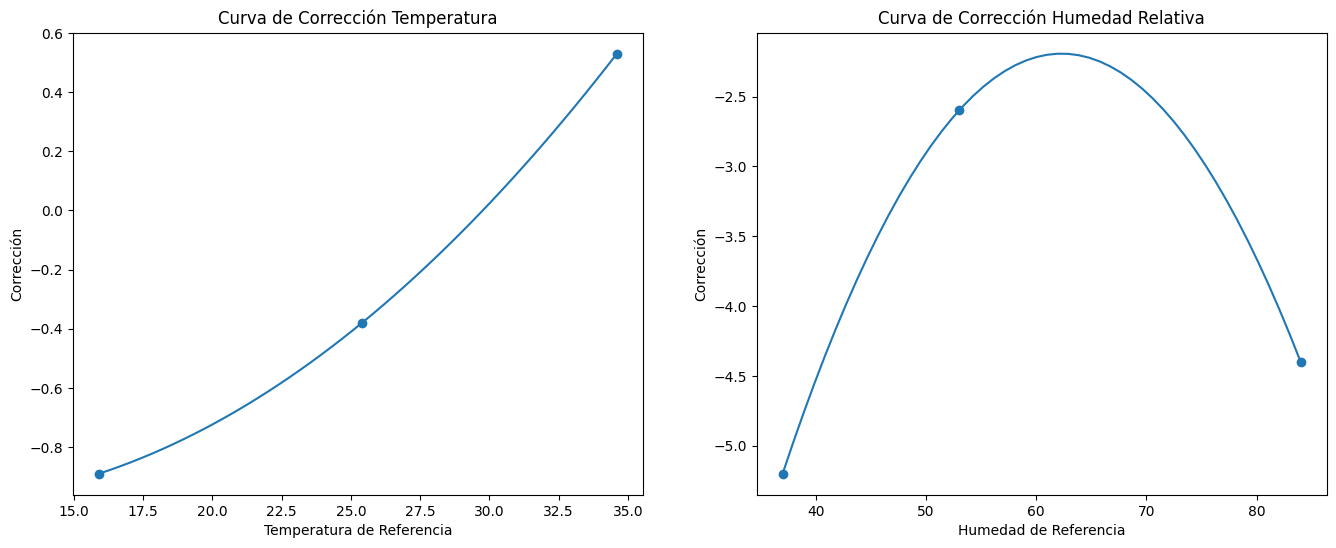

In [18]:
plt.figure(figsize=(25, 6))
plt.subplot(131)
plt.scatter(xit,yit)
plt.plot (polilínea1, Modelo1 (polilínea1))
plt.xlabel("Temperatura de Referencia")
plt.ylabel("Corrección")
plt.title('Curva de Corrección Temperatura')

plt.subplot(132)
plt.scatter(xih,yih)
plt.plot (polilínea2, Modelo2 (polilínea2))
plt.xlabel("Humedad de Referencia")
plt.ylabel("Corrección")
plt.title('Curva de Corrección Humedad Relativa')

# plt.subplot(133)
# plt.scatter(xip,yip)
# plt.plot (polilínea3, Modelo3 (polilínea3))
# plt.xlabel("Presión de Referencia")
# plt.ylabel("Corrección")
# plt.title('Curva de Corrección Humedad Presión')
# plt.show()

In [19]:
Tmedia = ((Info[Info["ITEM"]=="TEMPERATURA MÍNIMA (°C)"])["DATO"].iloc[0] + (Info[Info["ITEM"]=="TEMPERATURA MÁXIMA (°C)"])["DATO"].iloc[0])/2
TCorregida = Tmedia + (CoeficientesT.iloc[0].iloc[0]*Tmedia**2 + CoeficientesT.iloc[1].iloc[0]*Tmedia + CoeficientesT.iloc[2].iloc[0])

# Incertidumbre de Medición

In [20]:
X=Estabilidad.loc[[0,2,4,6,8,10,12],["UNIF RADIAL", "UNIF AXIAL", "ESTB_MEDIO"], ].reset_index().drop(["index"], axis=1)


In [64]:
Coef = pd.read_excel('1.Temperatura_Instancia_1.xlsx', sheet_name='COE')    
Incertidumbre= Med_Patron.loc[:,['VALOR DE REFERENCIA','INDICACIÓN IBC']]
Incertidumbre["IT Calibración Patrón"] = (T1["INCERTIDUMBRE TÍPICA"].max()) * Coef.iloc[0,0]
Incertidumbre["IT Deriva Patrón"] = T1["DERIVA"].max() / (np.sqrt(3)) * Coef.iloc[1,0]
Incertidumbre["IT Res Patrón"] = (T1.loc[0,"RESOLUCIÓN"]/ (np.sqrt(12))) * Coef.iloc[2,0]
Incertidumbre["Interpolación"] = np.sqrt((((np.sum(T2["RESIDUOS"].pow(2)))))/(len(T1)-len(Coeficientes))) * Coef.iloc[3,0]
Incertidumbre["IT Magn Influencia"] = ((T1.loc[0,"COEFICIENTE DE VARIACIÓN CON LA TEMPERATURA"] * (TCorregida - T1.loc[0,"TEMPERATURA DE CALIBRACIÓN"])) / (np.sqrt(3))) * Coef.iloc[4,0]
Incertidumbre["IT Unif Radial"] = (X["UNIF RADIAL"] / np.sqrt(12)) * Coef.iloc[5,0]
Incertidumbre["IT Unif Axial"] = (X["UNIF AXIAL"] / np.sqrt(12)) * Coef.iloc[6,0]
Incertidumbre["IT Estab Medio"] = (X["ESTB_MEDIO"] / np.sqrt(12)) * Coef.iloc[7,0]
Incertidumbre["IT Rep Patrón"] = (Mediciones.iloc[:,[1,3,5,7,9,11]].T.std() / np.sqrt(6)) * Coef.iloc[8,0]
Incertidumbre["IT Resolución EBP"]=(((Info[Info["ITEM"]=="RESOLUCIÓN"])["DATO"].iloc[0])/np.sqrt(12)) * Coef.iloc[9,0]
Incertidumbre["IT Rep EBP"] = (Mediciones.iloc[:,[2,4,6,8,10,12]].T.std() / np.sqrt(6)) * Coef.iloc[10,0]
Incertidumbre["Metodo ANOVA"] = (pd.read_excel('1.Temperatura_Instancia_1.xlsx', sheet_name='Anova').iloc[0,0]) * Coef.iloc[11,0]
Incertidumbre["Combinada"] = np.sqrt(np.sum(Incertidumbre.iloc[:,2:14].pow(2).T))

### Grados Efectivos de Libertad

In [65]:
GL= pd.read_excel('1.Temperatura_Instancia_1.xlsx', sheet_name='gl')
GL=GL.drop([4],axis=0)
r=Incertidumbre.copy().drop(["IT Magn Influencia"], axis=1)
r.loc[7]=0
r.iloc[7,2:13]=GL.T
PRUEBA1 = Incertidumbre.iloc[:, 2:6]
PRUEBA2 = Incertidumbre.iloc[:, 7:15]
PRUEBA = pd.concat([PRUEBA1, PRUEBA2], axis=1).T
PRUEBA ["GL"] = 0
PRUEBA ["GL"] = r.iloc[7,2:14].T
PRUEBA.loc["veff"] = 0
PRUEBA.loc["veff",0] = PRUEBA.loc["Combinada",0]**4 / np.sum(PRUEBA.iloc[0:11, 0].pow(4) / PRUEBA ["GL"])
PRUEBA.loc["veff",1] = PRUEBA.loc["Combinada",1]**4 / np.sum(PRUEBA.iloc[0:11, 1].pow(4) / PRUEBA ["GL"])
PRUEBA.loc["veff",2] = PRUEBA.loc["Combinada",2]**4 / np.sum(PRUEBA.iloc[0:11, 2].pow(4) / PRUEBA ["GL"])
PRUEBA.loc["veff",3] = PRUEBA.loc["Combinada",3]**4 / np.sum(PRUEBA.iloc[0:11, 3].pow(4) / PRUEBA ["GL"])
PRUEBA.loc["veff",4] = PRUEBA.loc["Combinada",4]**4 / np.sum(PRUEBA.iloc[0:11, 4].pow(4) / PRUEBA ["GL"])
PRUEBA.loc["veff",5] = PRUEBA.loc["Combinada",5]**4 / np.sum(PRUEBA.iloc[0:11, 5].pow(4) / PRUEBA ["GL"])
PRUEBA.loc["veff",6] = PRUEBA.loc["Combinada",6]**4 / np.sum(PRUEBA.iloc[0:11, 6].pow(4) / PRUEBA ["GL"])
Incertidumbre["veff"] = (PRUEBA.loc["veff"]).T

In [23]:
from scipy.stats import t

In [66]:
Incertidumbre["K"] = np.round(t.ppf(q=0.95 + 0.05/2, df=Incertidumbre["veff"], loc=0, scale=1),5)
Incertidumbre["U Expandida"] = Incertidumbre["Combinada"] * Incertidumbre["K"]

In [72]:
Incertidumbre["veff"] = np.round(Incertidumbre["veff"],0)
Incertidumbre["K"] = np.round(Incertidumbre["K"],2)
Incertidumbre

,VALOR DE REFERENCIA,INDICACIÓN IBC,IT Calibración Patrón,IT Deriva Patrón,IT Res Patrón,Interpolación,IT Magn Influencia,IT Unif Radial,IT Unif Axial,IT Estab Medio,IT Rep Patrón,IT Resolución EBP,IT Rep EBP,Metodo ANOVA,Combinada,veff,K,U Expandida
0,-25.704379,-25.811667,0.00395,0.020207,0.000289,0.002763,-0.002675,0.011836,0.024537,0.020207,-0.001633,-0.002887,-0.004014,0.007109,0.040828,692.0,1.96,0.080163
1,-15.488528,-15.573333,0.00395,0.020207,0.000289,0.002763,-0.002675,0.011836,0.024537,0.020207,-0.001014,-0.002887,-0.007149,0.007109,0.041235,718.0,1.96,0.080955
2,-0.356058,-0.384000,0.00395,0.020207,0.000289,0.002763,-0.002675,0.006928,0.027713,0.017032,-0.001174,-0.002887,-0.005933,0.007109,0.040501,578.0,1.96,0.079548
3,25.028132,25.043500,0.00395,0.020207,0.000289,0.002763,-0.002675,0.006928,0.027713,0.017032,-0.000715,-0.002887,-0.002335,0.007109,0.040121,557.0,1.96,0.078808
4,50.334908,50.379500,0.00395,0.020207,0.000289,0.002763,-0.002675,0.009526,0.025115,0.018475,-0.001498,-0.002887,-0.010760,0.007109,0.040970,713.0,1.96,0.080436
5,99.970334,100.066667,0.00395,0.020207,0.000289,0.002763,-0.002675,0.009815,0.026269,0.028290,-0.010168,-0.002887,-0.007601,0.007109,0.047388,724.0,1.96,0.093034
6,125.145020,125.035000,0.00395,0.020207,0.000289,0.002763,-0.002675,0.014434,0.028579,0.054848,-0.000307,-0.002887,-0.006191,0.007109,0.067598,417.0,1.97,0.132876


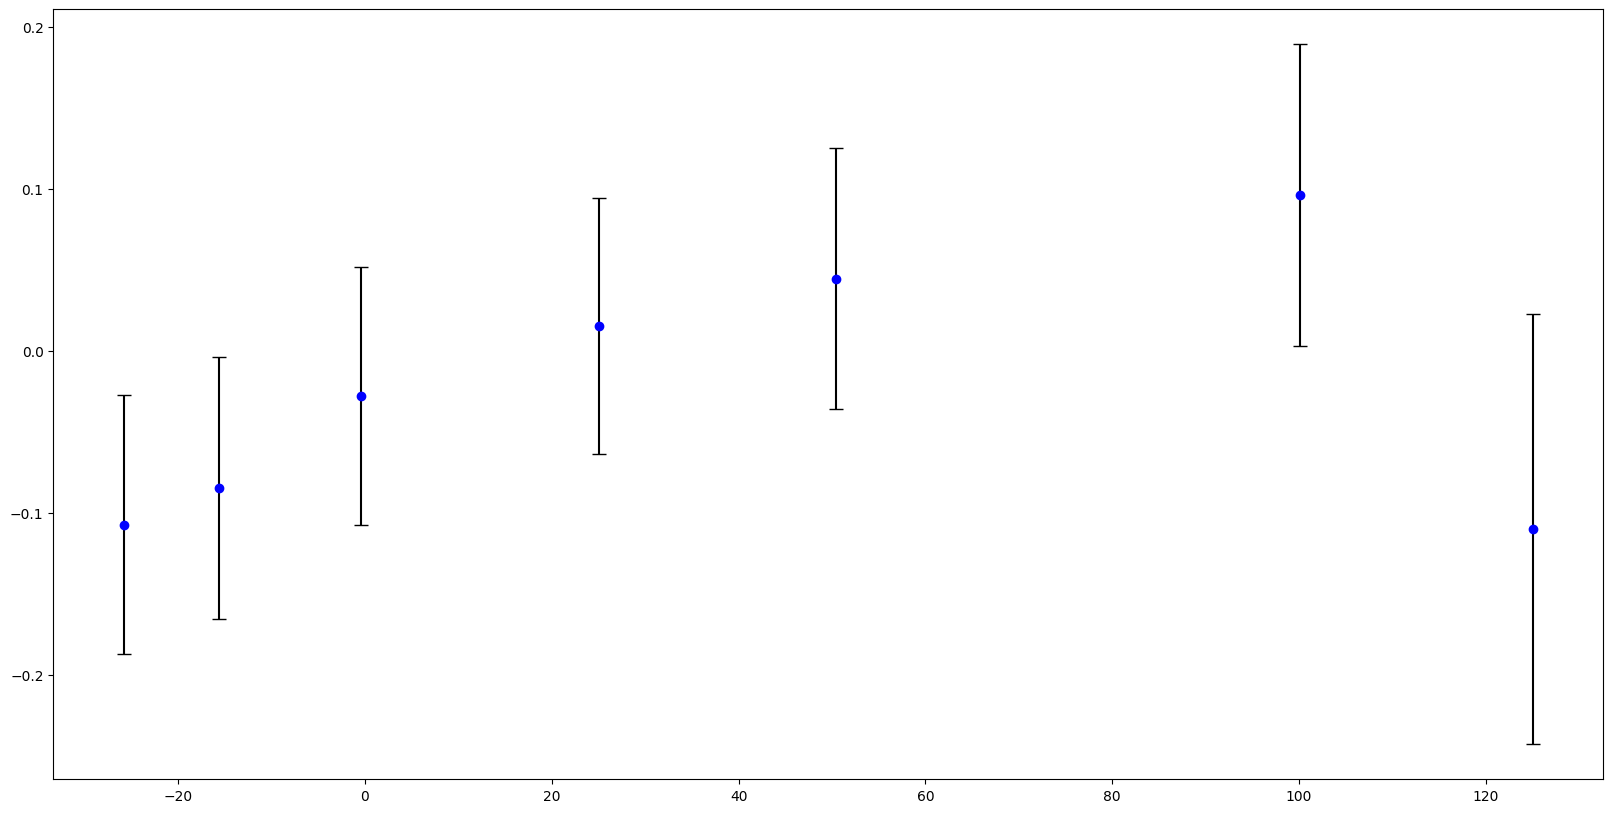

In [68]:
plt.figure(figsize=(20,10))
x=Med_Patron["INDICACIÓN IBC"]
y=Med_Patron["ERROR"]
plt.errorbar(x, y, yerr=Incertidumbre["U Expandida"], capsize=5, linestyle="None", fmt="ob", ecolor="k")
plt.show()